### A B Testing  ( Example 1)

A B Testing

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np

In [4]:
# Read file and inspect

audacity = pd.read_csv("/Users/X/Documents/Jupyter_Home/AB_testing/audacity.csv")
audacity.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [5]:
audacity.describe()

,id
count,8188.000000
mean,564699.749878
std,219085.845672
min,182988.000000
25%,373637.500000
50%,566840.500000
75%,758078.000000
max,937217.000000


In [6]:
audacity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  8188 non-null   object
 1   id         8188 non-null   int64 
 2   group      8188 non-null   object
 3   action     8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [7]:
audacity['action2'] = [1 if x == 'click' else 0 for x in audacity['action']]
audacity.head(10)

,timestamp,id,group,action,action2
0,2016-09-24 17:42:27.839496,804196,experiment,view,0
1,2016-09-24 19:19:03.542569,434745,experiment,view,0
2,2016-09-24 19:36:00.944135,507599,experiment,view,0
3,2016-09-24 19:59:02.646620,671993,control,view,0
4,2016-09-24 20:26:14.466886,536734,experiment,view,0
5,2016-09-24 20:32:25.712659,681598,experiment,view,0
6,2016-09-24 20:39:03.248853,522116,experiment,view,0
7,2016-09-24 20:57:20.336757,349125,experiment,view,0
8,2016-09-24 20:58:01.948663,349125,experiment,click,1
9,2016-09-24 21:00:12.278374,560027,control,view,0


In [8]:
# Make a 2 x 2 contingency table
table = pd.crosstab(audacity['action2'], audacity['group'], margins=False)
table

group,control,experiment
action2,,
0,3332,2996
1,932,928


In [9]:
# package to conduct chi square test for independence
from scipy.stats import chi2_contingency

# Using chi2_contingency
chi2_contingency(table)

(3.636160051233291,
 0.056537191086915774,
 1,
 array([[3295.38251099, 3032.61748901],
        [ 968.61748901,  891.38251099]]))

In [ ]:
# chi_2 statistic,  p_value , contingency table

### A B Testing  ( Example 2)
Camparing 2 variants: to see which one is better

##### Experiment
Comparing conversion on old webpage(control) vs new webpage (Treatement)
purchsase conversion = converted users/exposed users

In [10]:
## import library
import pandas as pd
import numpy as np
import datetime
from scipy.stats import chi2_contingency, beta
from IPython.display import Image

###### Data from kaggle https://www.kaggle.com/zhangluyuan/ab-testing

In [13]:
## Data processing
df =pd.read_csv('/Users/DPrempeh/Documents/Jupyter_Home/AB_testing/ab_data.csv')  

In [14]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


* Timestamp: time the user is first exposed
* group: bucket
* landing page: which page are they seeing
* converted: initialized to 0. changes to 1 if user makes purchase within 7 days of first purchase

In [18]:
df.shape

(294478, 5)

In [19]:
## Data Summary
start_time = datetime.datetime.strptime(df['timestamp'].min(), '%Y-%m-%d %H:%M:%S.%f')
end_time  =  datetime.datetime.strptime(df['timestamp'].max(), '%Y-%m-%d %H:%M:%S.%f')
data_duration = (end_time - start_time).days

print(f"Number of unique users in experiment: {df['user_id'].nunique()}")
print(f"Data collected for  {data_duration} days")
print(f"Landing Pages to compare: {df['landing_page'].unique().tolist()}")
print(f"Percent of users in control: {round(df[df['group']=='control'].shape[0] * 100/df.shape[0])}%")
print(f"Percent of users in treatment: {round(df[df['group']=='treatment'].shape[0] * 100/df.shape[0])}%")

Number of unique users in experiment: 290584
Data collected for  21 days
Landing Pages to compare: ['old_page', 'new_page']
Percent of users in control: 50%
Percent of users in treatment: 50%


In [20]:
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

###### Data dictionary
timestamp: time user is first exposed
group: bucket
landing_page: treatment or control group
converted: converted or not

###### Processing
Get time stamp of first exposure
Remove users with multiple buckets

In [21]:
#duplicate users in both groups
sample = df[df['user_id'].isin([746755,722274])]
sample

,user_id,timestamp,group,landing_page,converted
29073,746755,2017-01-11 01:28:57.083669,control,new_page,1
105487,722274,2017-01-19 01:46:53.093257,control,old_page,0
262554,722274,2017-01-09 21:21:23.638444,control,new_page,0
286566,746755,2017-01-05 03:40:08.457451,control,old_page,0


In [22]:
## get time stamp of first exposure
first_conv = sample.groupby('user_id')['timestamp'].min().to_frame().reset_index()
sample = sample.merge(first_conv, on=['user_id', 'timestamp'])
sample

,user_id,timestamp,group,landing_page,converted
0,722274,2017-01-09 21:21:23.638444,control,new_page,0
1,746755,2017-01-05 03:40:08.457451,control,old_page,0


In [23]:
#users in multiple groups
counter = df['user_id'].value_counts()
(counter > 1).value_counts()

False    286690
True       3894
Name: user_id, dtype: int64

In [24]:
# remove users in both groups
valid_users = pd.DataFrame(counter[counter==1].index, columns =['user_id'])
df = df.merge(valid_users, on=['user_id'])

In [25]:
#add week column to see the data as you would during experiment
df['week'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').isocalendar()[1])

In [26]:
df.head()

,user_id,timestamp,group,landing_page,converted,week
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,3
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,3


In [27]:
df['week'].value_counts()

2    91380
3    91056
1    83745
4    20509
Name: week, dtype: int64

##### Experiment: Frequentist Approach

In [65]:
#get stats
num_weeks = 4  #vary num to get expr data at weekly points in time
experiment_data = df[df['week'] == num_weeks]
control = experiment_data[experiment_data['group'] == 'control']
treatment = experiment_data[experiment_data['group'] == 'treatment']

control_conversion_perc = round(control['converted'].sum() * 100/control['converted'].count(),3)
treatment_conversion_perc = round(treatment['converted'].sum() * 100/treatment['converted'].count(),3)
lift = round(treatment_conversion_perc - control_conversion_perc, 3)

print(f"Treatment Conversion Rate:  {treatment_conversion_perc} %")
print(f"Control Conversion Rate: collected for  {control_conversion_perc} %")
print(f"Lift =  {lift} %")

Treatment Conversion Rate:  12.055 %
Control Conversion Rate: collected for  12.342 %
Lift =  -0.287 %


Chi-Squared Test

H0: control and Treatment are independent

Ha: control and Treatement are not independent

In [66]:
#Create contigency table for chi squared test
control_converted = control['converted'].sum()
treatment_converted = treatment['converted'].sum()
control_non_converted = control['converted'].count() - control_converted
treatment_non_converted = treatment['converted'].count() - treatment_converted
contingency_table = np.array([([control_converted, control_non_converted],
                              [treatment_converted,treatment_non_converted])])

In [61]:
contingency_table

array([[[1276, 9063],
        [1226, 8944]]])

In [62]:
chi, p_value, _, _ = chi2_contingency(contingency_table, correction = False)

In [63]:
chi, p_value

(0.3930355978684115, 0.5307080630950074)

Since pvalue (0.53) is not less than 0.05 we fail to reject the null hypotheiss

In [64]:
print(f" We are: {round(p_value * 100,2)}% confident that our lift = {lift}% ")

 We are: 53.07% confident that our lift = -0.287% 


In [34]:
### Repeating with less code

# Make a 2 x 2 contingency table
tableX = df[df['week'] == 4]  #vary num to get expr data at weekly points in time

tableX = pd.crosstab(tableX['converted'], tableX['group'], margins=False)
tableX

from scipy.stats import chi2_contingency
# Using chi2_contingency
chi2_contingency(tableX)


# chi_2 statistic,  p_value , contingency table



(0.36673808308793066,
 0.5447876832853289,
 1,
 array([[9077.69140377, 8929.30859623],
        [1261.30859623, 1240.69140377]]))

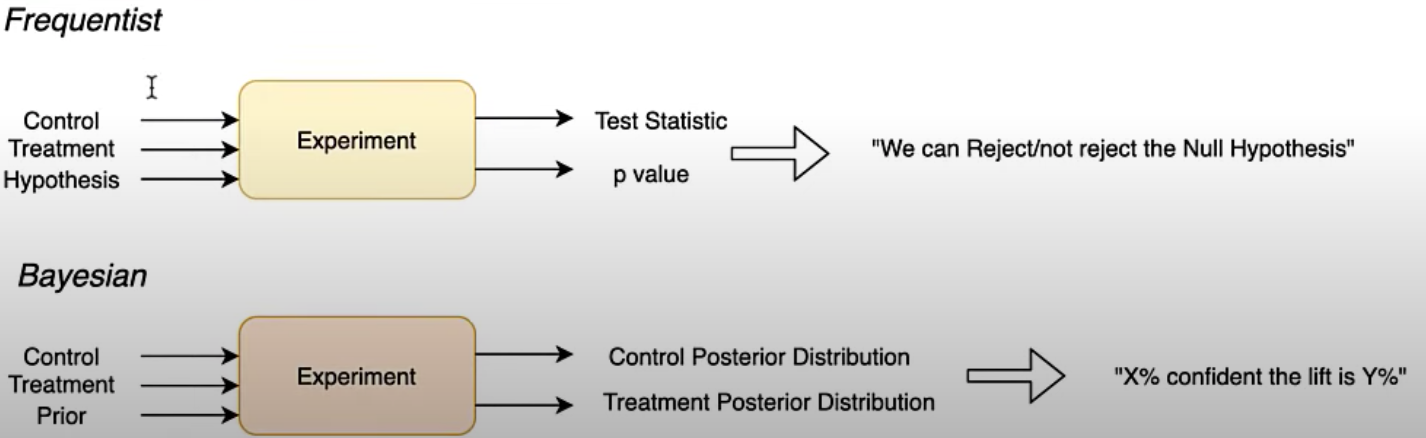

In [31]:
Image(filename ='/Users/DPrempeh/Documents/Jupyter_Home/AB_testing/frequentist_vs_baysian.png')

##### Experiment: Baysian Approach

Prior distribution -> experiment  -> post distribution

In [68]:
prior = df[(df['week'] == 1) & (df['group'] == 'control')]

In [69]:
prior_means = []
for i in range(10000):
    prior_means.append(prior.sample(1000)['converted'].mean())

In [70]:
prior_means[:10]

[0.122, 0.128, 0.114, 0.133, 0.119, 0.112, 0.129, 0.105, 0.12, 0.127]

In [71]:
#model beta distribution from sample mean
prior_alpha, prior_beta, _ , _ = beta.fit(prior_means, floc =0,fscale =1)

In [72]:
#get stats
num_weeks = 2  #vary num to get expr data at weekly points in time
experiment_data = df[(df['week'] > 1) & (df['week'] <= num_weeks)]
control = experiment_data[experiment_data['group'] == 'control']
treatment = experiment_data[experiment_data['group'] == 'treatment']

control_conversion_perc = round(control['converted'].sum() * 100/control['converted'].count(),3)
treatment_conversion_perc = round(treatment['converted'].sum() * 100/treatment['converted'].count(),3)
lift = round((treatment_conversion_perc - control_conversion_perc)/ control_conversion_perc, 3)

print(f"Treatment Conversion Rate:  {treatment_conversion_perc} %")
print(f"Control Conversion Rate: collected for  {control_conversion_perc} %")
print(f"Lift =  {lift} %")


Treatment Conversion Rate:  11.817 %
Control Conversion Rate: collected for  11.925 %
Lift =  -0.009 %


In [73]:
#Create contigency table for chi squared test
control_converted = control['converted'].sum()
treatment_converted = treatment['converted'].sum()
control_non_converted = control['converted'].count() - control_converted
treatment_non_converted = treatment['converted'].count() - treatment_converted

#update prior parameters with experiment conversion rates
posterior_control = beta(prior_alpha + control_converted, prior_beta + control_non_converted)
posterior_treatment = beta(prior_alpha + treatment_converted, prior_beta + treatment_non_converted)

#sample from posteriors
control_samples = posterior_control.rvs(1000)
treatment_samples = posterior_treatment.rvs(1000)
probability = np.mean(treatment_samples > control_samples)
print(f"Probability that treatment > control  {probability * 100} %")

Probability that treatment > control  31.2 %


In [74]:
(control_mu),(control_var) = posterior_control.stats()
(treatment_mu), (treatment_var) = posterior_treatment.stats()
print(f"control posterior: mean  {control_mu}, Variance: {control_var}")
print(f"treatment posterior: mean  {treatment_mu}, Variance: {treatment_var}")

control posterior: mean  0.11925212452831274, Variance: 2.2482126200287495e-06
treatment posterior: mean  0.11819935070823354, Variance: 2.230551246791972e-06


We can make statements like the following which are actionable

In [75]:
lift_percentage = (treatment_samples - control_samples)/ control_samples
print(f"Probability that we are seeing a 2% lift:  {np.mean((100* lift_percentage) > 2) * 100} %")

Probability that we are seeing a 2% lift:  5.2 %


In [18]:
# using isocalendars
Todays_date = datetime.date.today()
print(Todays_date)
print(Todays_date.isocalendar())

2022-01-21
datetime.IsoCalendarDate(year=2022, week=3, weekday=5)
